## 14.03.2022

# <center> Авторегрессионные модели прогнозирования </center>

## 2. Модели класса ARMA

### 2.1. ARMA

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('C:/Users/mag/lynx.csv', index_col="Year", parse_dates=True)
df.head()

,Annual number of lynx trapped
Year,
1821-01-01,269
1822-01-01,321
1823-01-01,585
1824-01-01,871
1825-01-01,1475


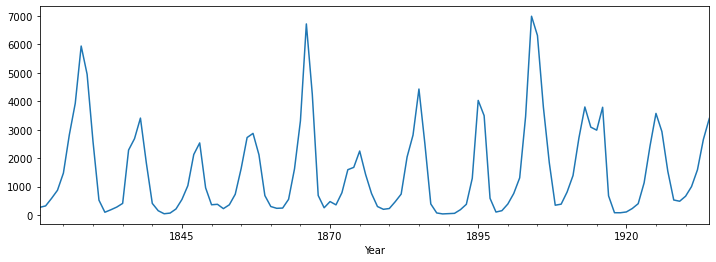

In [13]:
df['Annual number of lynx trapped'].plot(figsize = (12, 4))
plt.show()

In [50]:
data = pd.read_csv('C:/Users/mag/lynx.csv')

In [51]:
data.columns = ['year', 'y']

In [52]:
data['y1'] = data ['y'].shift(1)
data['y2'] = data ['y'].shift(2)

In [3]:
from scipy import optimize

In [55]:
data = data.dropna()

In [59]:
np.mean((data['y'] - 2 * data['y1'] - 3 * data['y2'] + 10)**2)

82277145.88392857

In [61]:
data

,year,y,y1,y2
2,1823,585,321.0,269.0
3,1824,871,585.0,321.0
4,1825,1475,871.0,585.0
5,1826,2821,1475.0,871.0
6,1827,3928,2821.0,1475.0
...,...,...,...,...
109,1930,662,485.0,529.0
110,1931,1000,662.0,485.0
111,1932,1590,1000.0,662.0
112,1933,2657,1590.0,1000.0


In [60]:
df['Annual number of lynx trapped'].shift(1)

Year
1821-01-01       NaN
1822-01-01     269.0
1823-01-01     321.0
1824-01-01     585.0
1825-01-01     871.0
               ...  
1930-01-01     485.0
1931-01-01     662.0
1932-01-01    1000.0
1933-01-01    1590.0
1934-01-01    2657.0
Name: Annual number of lynx trapped, Length: 114, dtype: float64

In [100]:
data['const'] = 1

<ipython-input-100-33ac47f10509>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['const'] = 1


def mse1 (data, alpha, phi1, phi2):
    return np.mean((data['y'] - np.dot(data.loc[:, 'y1':].values, [phi1,phi2,alpha]) * data['y1'] - phi1 * data['y2'] -alpha)**2)

In [101]:
def mse (phi1, phi2, alpha):
    return np.mean((data['y'] - phi1 * data['y1'] - phi2 * data['y2'] -alpha)**2)

In [43]:
from scipy import optimize

In [103]:
res = optimize.minimize(lambda x: mse(x[0], x[1], x[2]),(1,1,1))
res

      fun: 776676.8542898056
 hess_inv: array([[ 3.93947280e-07, -3.10561318e-07, -8.95818072e-05],
       [-3.10561318e-07,  3.96214215e-07, -8.25369847e-05],
       [-8.95818072e-05, -8.25369847e-05,  5.02636162e-01]])
      jac: array([3.609375 , 3.6328125, 0.       ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 231
      nit: 6
     njev: 55
   status: 2
  success: False
        x: array([ 1.15242199e+00, -6.06229527e-01,  7.10109918e+02])

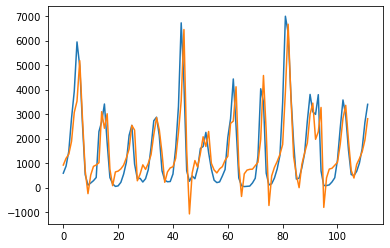

In [104]:
plt.plot(data['y'].values)
plt.plot(np.dot(data.loc[:, 'y1':], res.x))

In [109]:
f = np.dot(data.loc[:, 'y1':], res.x)

In [112]:
f1 = data['y'] - f

In [114]:
f1 = pd.DataFrame(f1)
f1 = f1.reset_index()

In [115]:
f1

,index,y
0,2,-331.961634
1,3,-318.677103
2,4,115.774803
3,5,939.093566
4,6,861.096203
...,...,...
107,109,-286.339163
108,110,-178.991954
109,111,128.792040
110,112,720.768647


In [117]:
f1 = f1.drop('index', axis = 1)

In [118]:
f1

,y
0,-331.961634
1,-318.677103
2,115.774803
3,939.093566
4,861.096203
...,...
107,-286.339163
108,-178.991954
109,128.792040
110,720.768647


In [119]:
f1['y1'] = f1 ['y'].shift(1)
f1['y2'] = f1 ['y'].shift(2)

In [120]:
f1

,y,y1,y2
0,-331.961634,NaN,NaN
1,-318.677103,-331.961634,NaN
2,115.774803,-318.677103,-331.961634
3,939.093566,115.774803,-318.677103
4,861.096203,939.093566,115.774803
...,...,...,...
107,-286.339163,97.033633,-173.098853
108,-178.991954,-286.339163,97.033633
109,128.792040,-178.991954,-286.339163
110,720.768647,128.792040,-178.991954


In [121]:
f2 = f1.dropna()

In [177]:
def mse1 (theta1, theta2, beta):
    return np.mean((-theta1*f2['y1'] - theta2*f2['y2'] - beta + f2['y'])**2)

In [179]:
res1 = optimize.minimize(lambda x: mse1(x[0], x[1], x[2]),(1,1,1))
res1

      fun: 771098.895742362
 hess_inv: array([[ 1.00199333e-05, -1.04428418e-05, -7.67496814e-05],
       [-1.04428418e-05,  1.09898241e-05,  7.96648557e-05],
       [-7.67496814e-05,  7.96648557e-05,  5.91824910e-04]])
      jac: array([0.046875 , 0.03125  , 0.0234375])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 300
      nit: 13
     njev: 72
   status: 2
  success: False
        x: array([-0.02090929, -0.14952244,  4.08487799])

In [180]:
f2['const'] = 1

<ipython-input-180-051ddf401e68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f2['const'] = 1


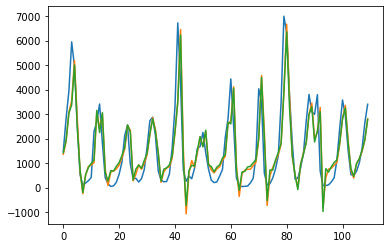

In [187]:
plt.plot(data['y'].values[2:])
plt.plot(np.dot(data.loc[:, 'y1':], res.x)[2:])
plt.plot(np.dot(f2.loc[:, 'y1':], res1.x) + np.dot(data.loc[:, 'y1':], res.x)[2:])

## 21.03.2022

In [4]:
from scipy.optimize import minimize

In [5]:
passengers = pd.read_csv('C:/Users/79811/anaconda3/passengers.csv', index_col="date", parse_dates=True)
passengers.head()

,num_passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


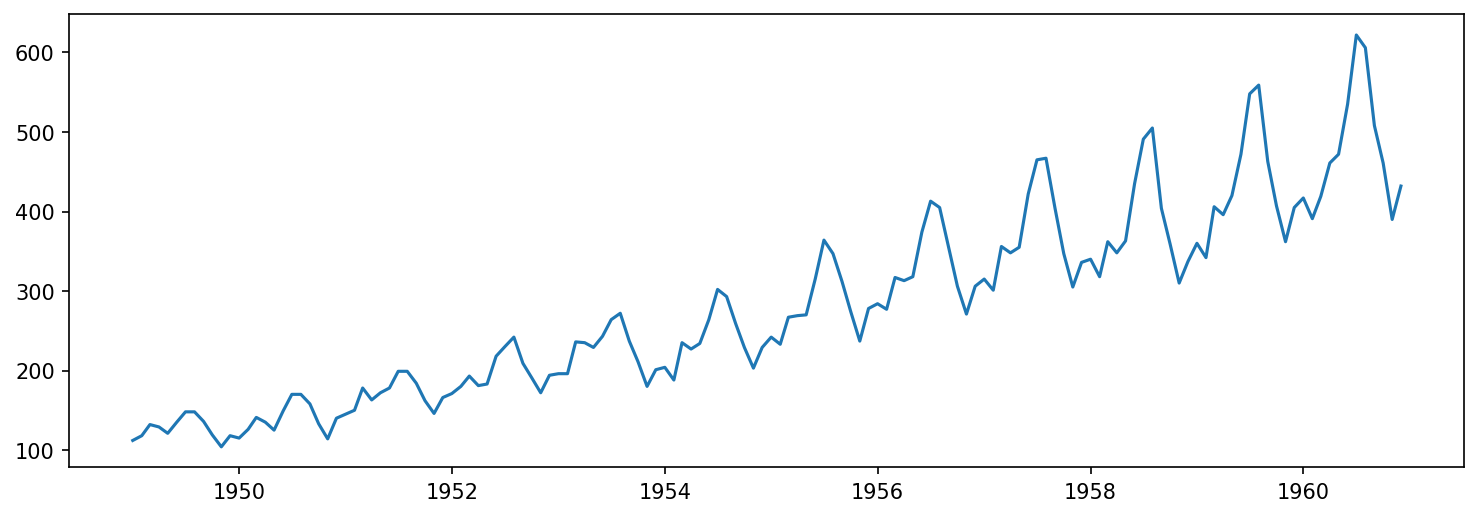

In [45]:
plt.figure(figsize=(12,4), dpi=150)
plt.plot(passengers["num_passengers"])
plt.show()

In [8]:
def boks_koks(y,l):
    if l==0:
        return np.log(y)
    else:
        return (y**l-1)/l

In [9]:
boks_koks(passengers, 0)

,num_passengers
date,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [14]:
def f(y, l):
    T = y.shape[0]
    return  T/2*np.log(np.sum((boks_koks(y,l)-np.mean(boks_koks(y,l)))**2)/T)-(l-1)*np.sum(np.log(y))

In [15]:
f(passengers, 1)

num_passengers    688.856641
dtype: float64

In [19]:
res2 = minimize(lambda x: f(passengers["num_passengers"], x[0]), (0))
res2

      fun: 679.5431311684134
 hess_inv: array([[0.0386732]])
      jac: array([-7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([0.14802255])

In [20]:
l = res2.x
l

array([0.14802255])

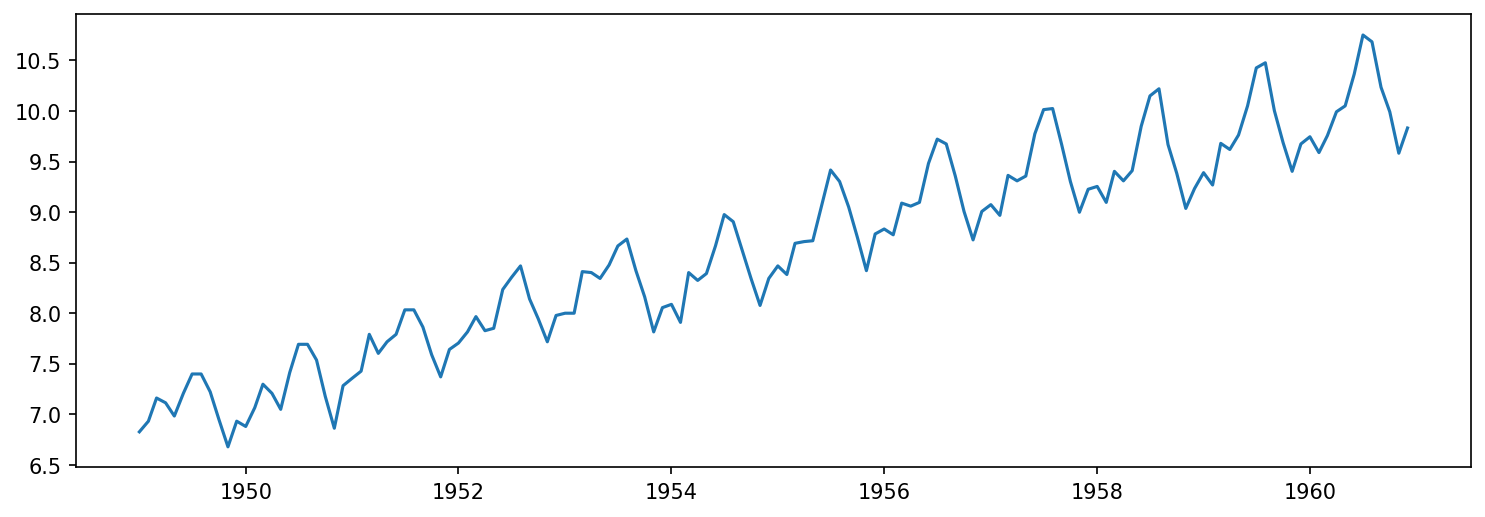

In [55]:
plt.figure(figsize=(12,4), dpi=150)
plt.plot(boks_koks(passengers["num_passengers"], l))
plt.show()

### 2.2. SARIMA

In [21]:
s = boks_koks(passengers, l)

In [22]:
s1 = s.diff(12)

In [23]:
s2 = s1.diff(1)

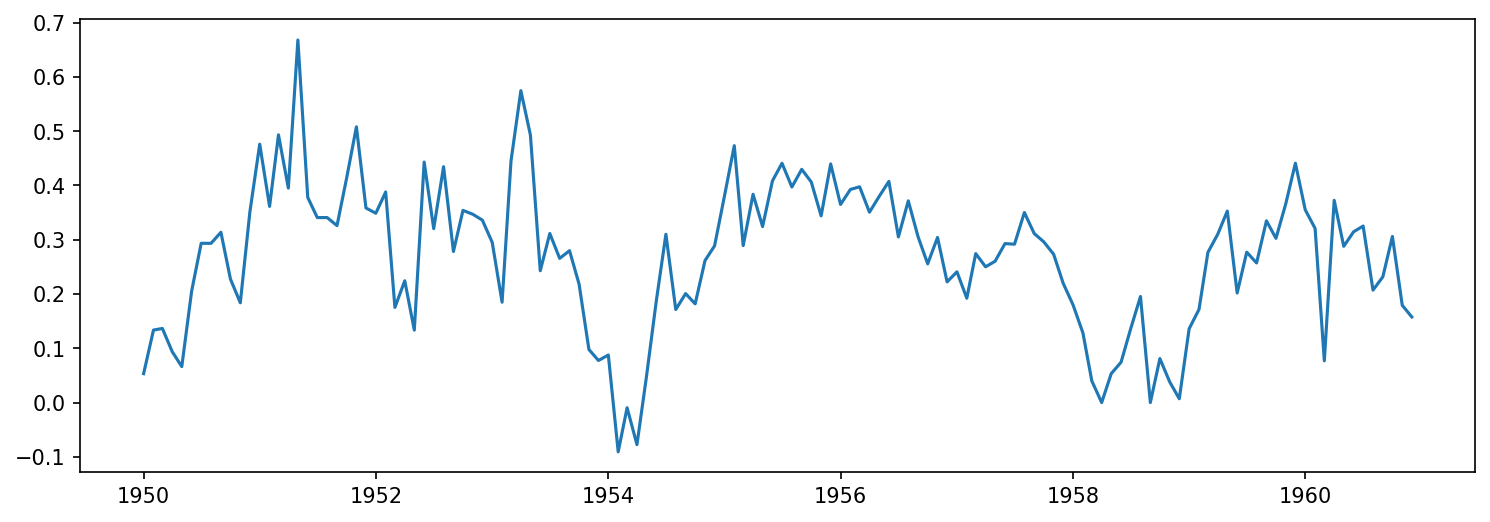

In [24]:
plt.figure(figsize=(12,4), dpi=150)
plt.plot(s1)
plt.show()

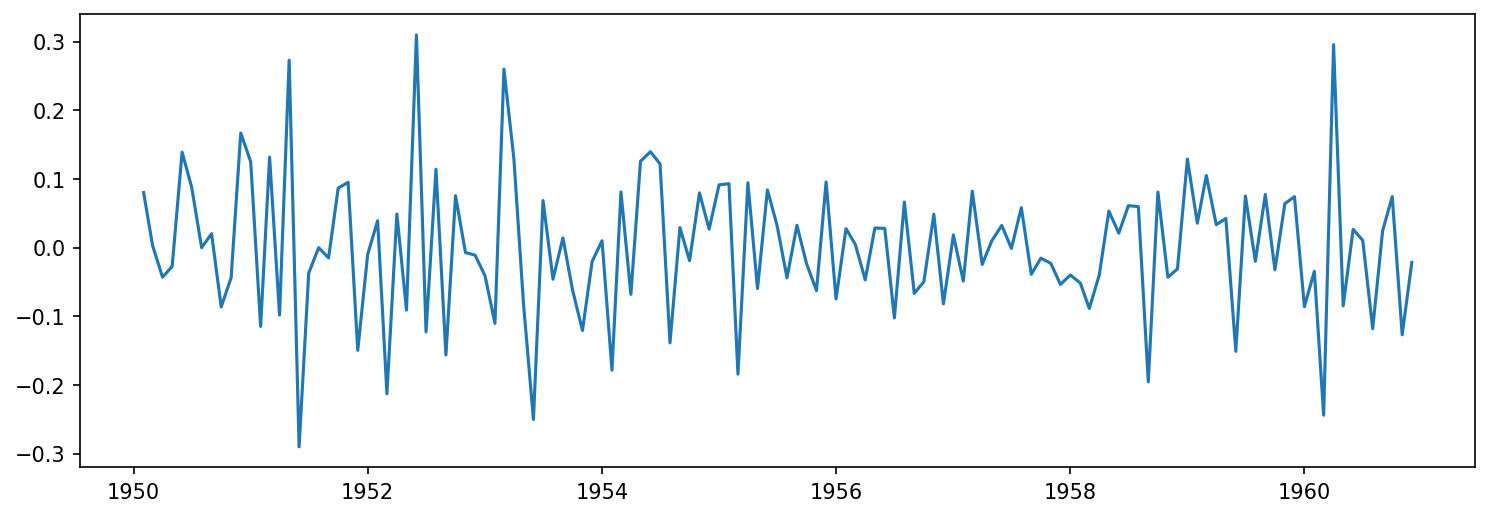

In [25]:
plt.figure(figsize=(12,4), dpi=150)
plt.plot(s2)
plt.show()

In [26]:
s2

,num_passengers
date,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,-0.118024
1960-09-01,0.024514
1960-10-01,0.074345


In [27]:
ts = pd.DataFrame(s2).dropna()
ts.columns = ['y']

In [28]:
ts['y(t-1)'] = ts.shift(1)
ts['y(t-2)'] = ts ['y'].shift(2)
ts['y(t-3)'] = ts ['y'].shift(3)
ts['y(t-12)'] = ts ['y'].shift(12)

In [29]:
ts['const'] = 1

In [30]:
ts

,y,y(t-1),y(t-2),y(t-3),y(t-12),const
date,,,,,,
1950-02-01,0.080310,NaN,NaN,NaN,NaN,1
1950-03-01,0.002985,0.080310,NaN,NaN,NaN,1
1950-04-01,-0.042892,0.002985,0.080310,NaN,NaN,1
1950-05-01,-0.027351,-0.042892,0.002985,0.080310,NaN,1
1950-06-01,0.139146,-0.027351,-0.042892,0.002985,NaN,1
...,...,...,...,...,...,...
1960-08-01,-0.118024,0.010598,0.026706,-0.084686,-0.019876,1
1960-09-01,0.024514,-0.118024,0.010598,0.026706,0.077553,1
1960-10-01,0.074345,0.024514,-0.118024,0.010598,-0.032159,1


In [31]:
def mse3 (data, params):
    y = data['y']
    y_lag = data.drop('y', axis=1)
    return np.mean((y-np.dot(y_lag, params))**2)

In [32]:
res3 = minimize(lambda x: mse3(ts, [x[0], x[1], x[2], x[3], x[4]]),(0,0,0,0,0))
res3.x

array([-0.37036418, -0.06530274, -0.08828808, -0.39063126, -0.00186333])

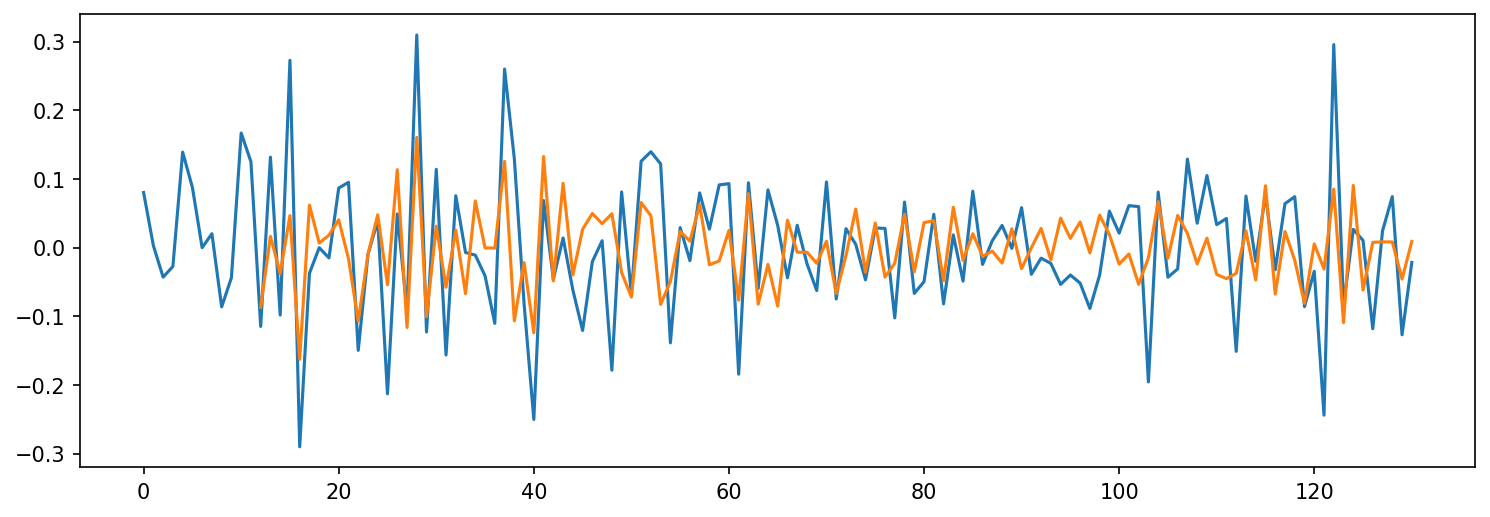

In [33]:
plt.figure(figsize=(12,4), dpi=150)
plt.plot(ts['y'].values)
plt.plot(np.dot(ts.loc[:, 'y(t-1)':], res3.x))

In [34]:
z = np.dot(ts.loc[:, 'y(t-1)':], res3.x)

In [35]:
z1 = ts['y'] - z

In [36]:
z1 = pd.DataFrame(z1)
z1 = z1.reset_index()

In [37]:
z1

,date,y
0,1950-02-01,NaN
1,1950-03-01,NaN
2,1950-04-01,NaN
3,1950-05-01,NaN
4,1950-06-01,NaN
...,...,...
126,1960-08-01,-0.125733
127,1960-09-01,0.016010
128,1960-10-01,0.065954
129,1960-11-01,-0.081215


In [38]:
z1 = z1.drop('date', axis = 1)

In [39]:
z1

,y
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
126,-0.125733
127,0.016010
128,0.065954
129,-0.081215


In [40]:
z1['y1'] = z1 ['y'].shift(1)
z1['y2'] = z1 ['y'].shift(2)

In [41]:
z2 = z1.dropna()

In [62]:
z2

,y,y1,y2
14,-0.060653,0.115345,-0.027995
15,0.226174,-0.060653,0.115345
16,-0.127468,0.226174,-0.060653
17,-0.099159,-0.127468,0.226174
18,-0.006733,-0.099159,-0.127468
...,...,...,...
126,-0.125733,0.072312,-0.063981
127,0.016010,-0.125733,0.072312
128,0.065954,0.016010,-0.125733
129,-0.081215,0.065954,0.016010


In [185]:
z2['const'] = 1

<ipython-input-185-b497ba7f6291>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z2['const'] = 1


In [63]:
def mse4(z2, theta1, theta2, alpha):
    return np.mean((z2["y"] - (alpha + theta1*z2["y1"] + theta2*z2["y2"]))**2)

In [67]:
func = lambda x: mse4(z2, x[0], x[1], x[2])

optimization = minimize(func, (0, 0, 0))
optimization

      fun: 0.007364243448303661
 hess_inv: array([[ 6.07890346e+01,  1.23713296e+01, -2.84658711e-02],
       [ 1.23713296e+01,  5.68516565e+01, -2.86421949e-01],
       [-2.84658711e-02, -2.86421949e-01,  4.66246657e-01]])
      jac: array([ 1.07084634e-06, -1.40228076e-06, -3.35508958e-06])
  message: 'Optimization terminated successfully.'
     nfev: 72
      nit: 17
     njev: 18
   status: 0
  success: True
        x: array([-0.06498903, -0.01158742, -0.00070766])

In [68]:
theta1, theta2, alpha2 = optimization.x

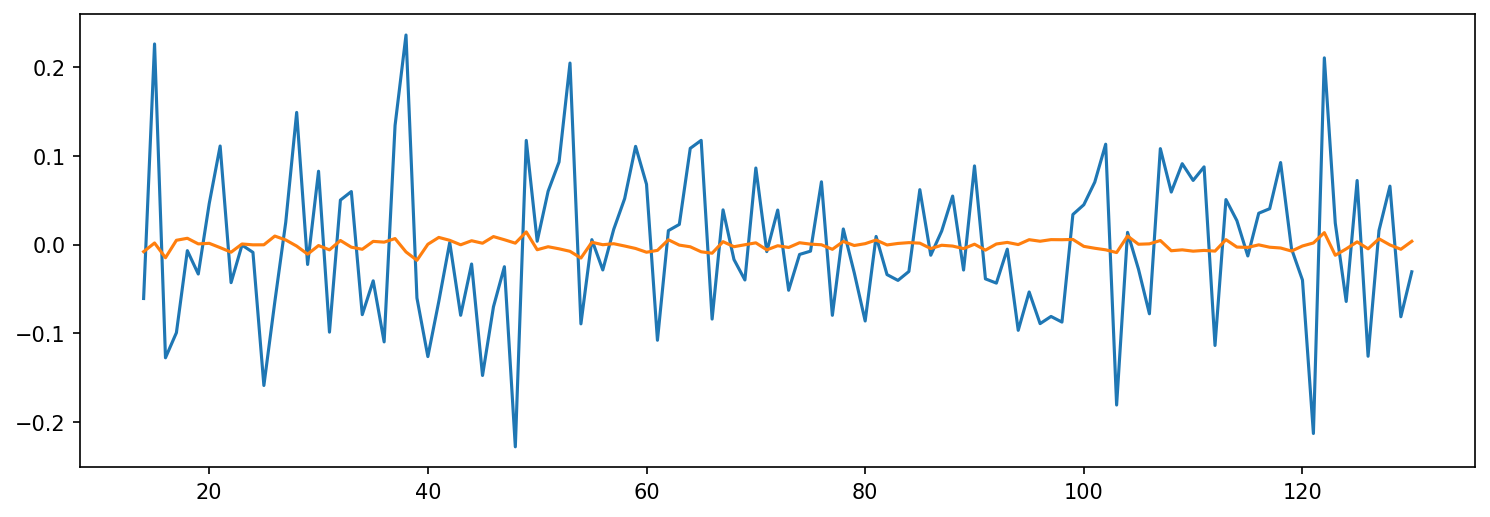

In [70]:
plt.figure(figsize=(12,4), dpi=150)
plt.plot(z2['y'])
plt.plot(alpha2 + theta1*z2["y1"] + theta2*z2["y2"])
plt.show()